# Información

* https://www.kaggle.com/datasets/paultimothymooney/stock-market-data
* https://www.youtube.com/watch?v=wH_ezgftiy0
* https://www.influxdata.com/blog/how-convert-timestamp-to-datetime-in-python/
* https://www.youtube.com/watch?v=iX_on3VxZzk

# Imports

In [1]:
from datetime import date
from datetime import datetime

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import boxplot
from scipy import stats

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import r2_score

In [6]:
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional

In [7]:
import tensorflow as tf

# Datos

In [8]:
!kaggle datasets download -d paultimothymooney/stock-market-data

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/stock-market-data
License(s): other
 99% 1.03G/1.03G [00:14<00:00, 71.8MB/s]
100% 1.03G/1.03G [00:14<00:00, 75.2MB/s]


In [9]:
!unzip "stock-market-data" -d "data/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: data/stock_market_data/nasdaq/json/CLNT.json  
  inflating: data/stock_market_data/nasdaq/json/CLRB.json  
  inflating: data/stock_market_data/nasdaq/json/CLRI.json  
  inflating: data/stock_market_data/nasdaq/json/CLRO.json  
  inflating: data/stock_market_data/nasdaq/json/CLRX.json  
  inflating: data/stock_market_data/nasdaq/json/CLTX.json  
  inflating: data/stock_market_data/nasdaq/json/CLVS.json  
  inflating: data/stock_market_data/nasdaq/json/CLWT.json  
  inflating: data/stock_market_data/nasdaq/json/CLYAF.json  
  inflating: data/stock_market_data/nasdaq/json/CMCO.json  
  inflating: data/stock_market_data/nasdaq/json/CMCSA.json  
  inflating: data/stock_market_data/nasdaq/json/CMCT.json  
  inflating: data/stock_market_data/nasdaq/json/CME.json  
  inflating: data/stock_market_data/nasdaq/json/CMGE.json  
  inflating: data/stock_market_data/nasdaq/json/CMLS.json  
  inflating: data/stock_market_d

In [10]:
!rm "stock-market-data.zip"

# Dataframe

In [11]:
df_cl = pd.read_csv("data/stock_market_data/forbes2000/csv/CL.csv")

## Primeros datos

In [12]:
df_cl.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,02-05-1973,1.966146,0.0,672000,2.000000,2.000000,0.467217
1,03-05-1973,1.953125,0.0,739200,2.013021,2.005208,0.468434
2,04-05-1973,1.989583,0.0,1339200,2.028646,2.000000,0.467217
3,07-05-1973,1.984375,0.0,316800,2.015625,1.989583,0.464784
4,08-05-1973,1.947917,0.0,619200,1.989583,1.986979,0.464176


## Información

In [13]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            12515 non-null  object 
 1   Low             12515 non-null  float64
 2   Open            12515 non-null  float64
 3   Volume          12515 non-null  int64  
 4   High            12515 non-null  float64
 5   Close           12515 non-null  float64
 6   Adjusted Close  12515 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 684.5+ KB


## Tipo de datos

In [14]:
df_cl.dtypes

Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

## Forma del Dataframe (filas, columnas)

In [15]:
df_cl.shape

(12515, 7)

## Cambiando el tipo de dato de la(s) columna(s).

In [16]:
df_cl["Date"] = pd.to_datetime(df_cl['Date'], format='%d-%m-%Y', utc = False)
df_cl["Date"] = pd.to_datetime(df_cl["Date"]).dt.date
df_cl["Date"] = pd.to_datetime(df_cl["Date"]).dt.normalize()

## Tipo de datos

In [17]:
df_cl.dtypes

Date              datetime64[ns]
Low                      float64
Open                     float64
Volume                     int64
High                     float64
Close                    float64
Adjusted Close           float64
dtype: object

## Primeros datos

In [18]:
df_cl.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1973-05-02,1.966146,0.0,672000,2.000000,2.000000,0.467217
1,1973-05-03,1.953125,0.0,739200,2.013021,2.005208,0.468434
2,1973-05-04,1.989583,0.0,1339200,2.028646,2.000000,0.467217
3,1973-05-07,1.984375,0.0,316800,2.015625,1.989583,0.464784
4,1973-05-08,1.947917,0.0,619200,1.989583,1.986979,0.464176


## Cantidad datos

In [19]:
df_cl.count()

Date              12515
Low               12515
Open              12515
Volume            12515
High              12515
Close             12515
Adjusted Close    12515
dtype: int64

## Cantidad nulos

In [20]:
df_cl.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

## Descripción columnas

In [21]:
df_cl.describe()

,Date,Low,Open,Volume,High,Close,Adjusted Close
count,12515,12515.000000,12515.000000,1.251500e+04,12515.000000,12515.000000,12515.000000
mean,1998-02-11 01:50:06.855773056,25.333094,25.416495,3.548345e+06,25.755995,25.553697,20.194641
min,1973-05-02 00:00:00,0.687500,0.000000,9.440000e+04,0.726563,0.703125,0.212563
25%,1985-09-16 12:00:00,1.984375,1.695313,2.018800e+06,2.031250,2.007813,0.719475
50%,1998-02-02 00:00:00,18.031250,18.281250,3.080000e+06,18.593750,18.312500,10.958378
75%,2010-07-10 12:00:00,39.537498,39.872499,4.442000e+06,40.187500,39.907499,29.760018
max,2022-12-12 00:00:00,85.379997,86.070000,4.701360e+07,86.410004,86.260002,83.323082
std,NaN,25.944647,26.245608,2.601720e+06,26.315490,26.132791,23.929413


# Gráfico(s)

## Mapa de Calor

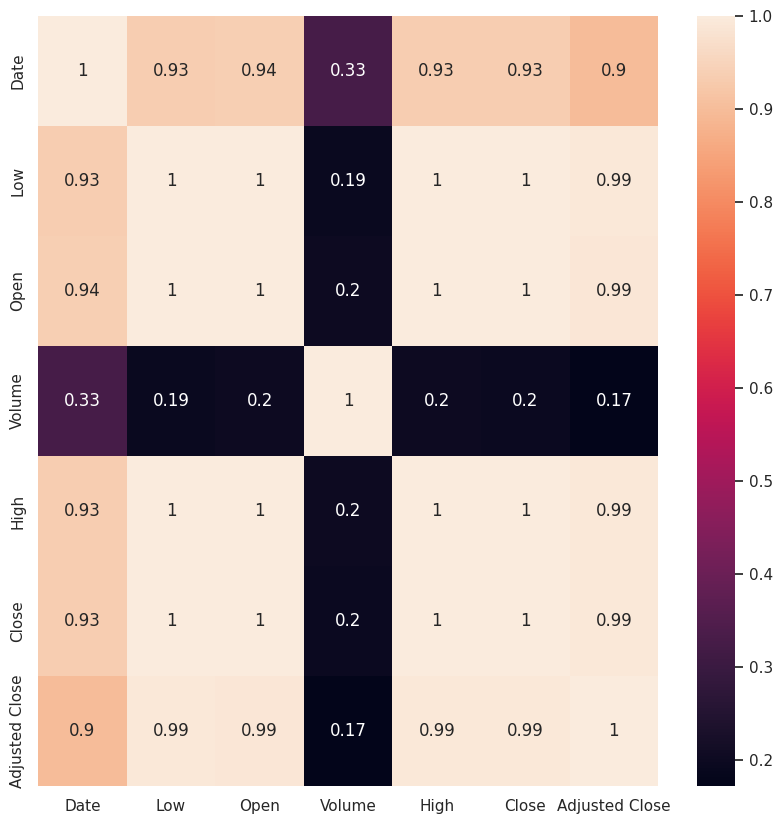

In [22]:
sns.set(
    rc = {
        "figure.figsize" : (10, 10)
    }
)

sns.heatmap(
    df_cl.corr(),
    annot = True
);

## Densidad

<Axes: ylabel='Density'>

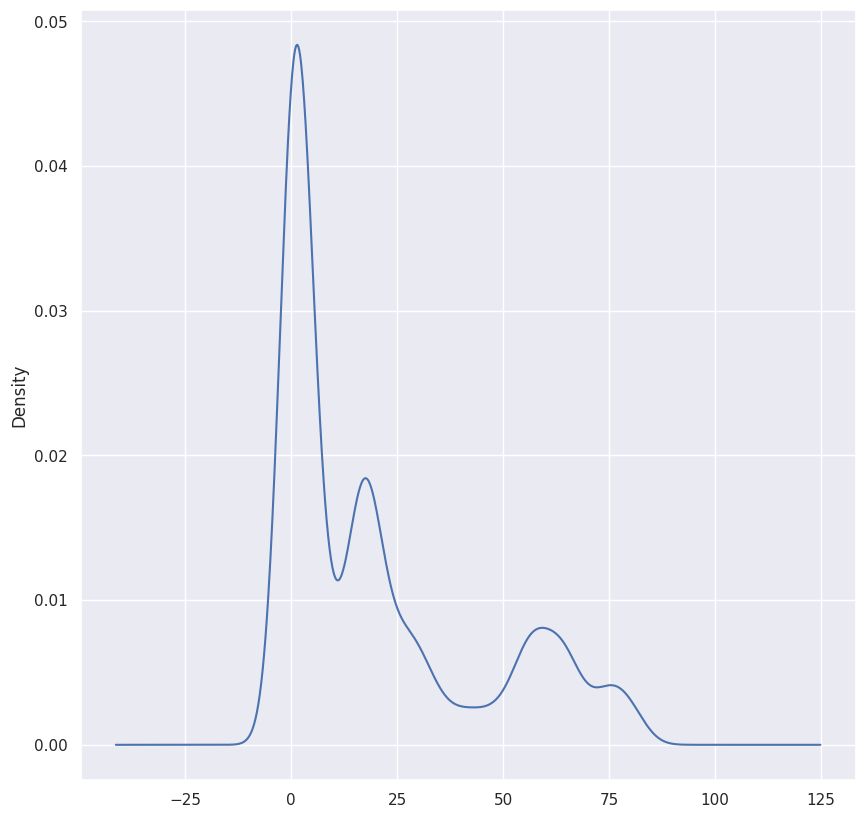

In [23]:
df_cl["Adjusted Close"].plot.density()

<Axes: ylabel='Density'>

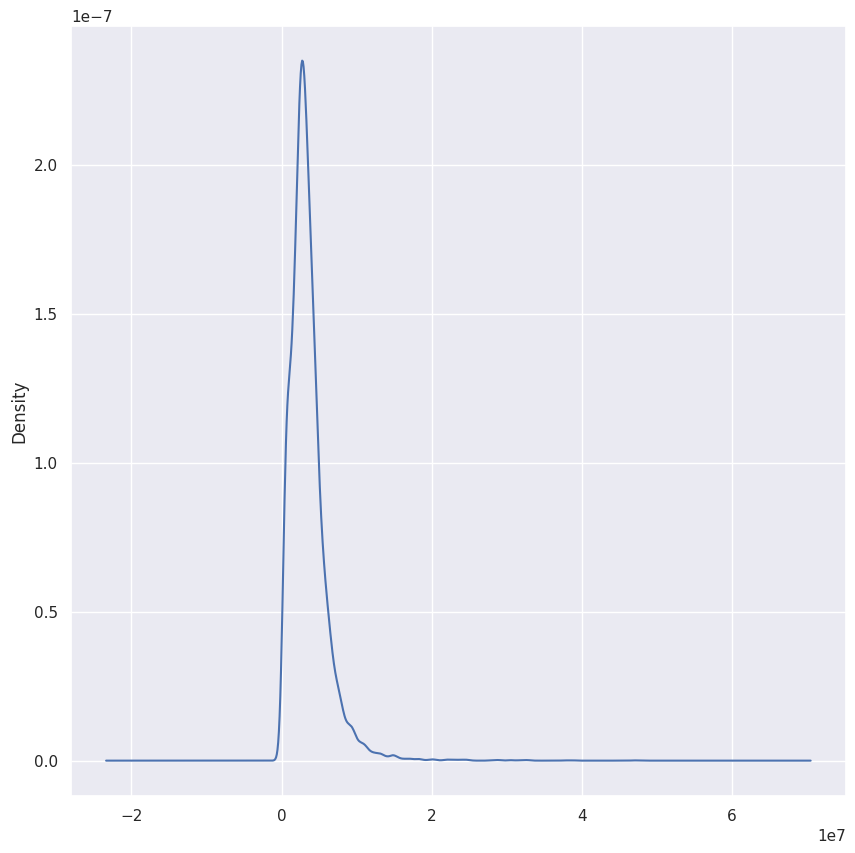

In [24]:
df_cl["Volume"].plot.density()

<Axes: ylabel='Density'>

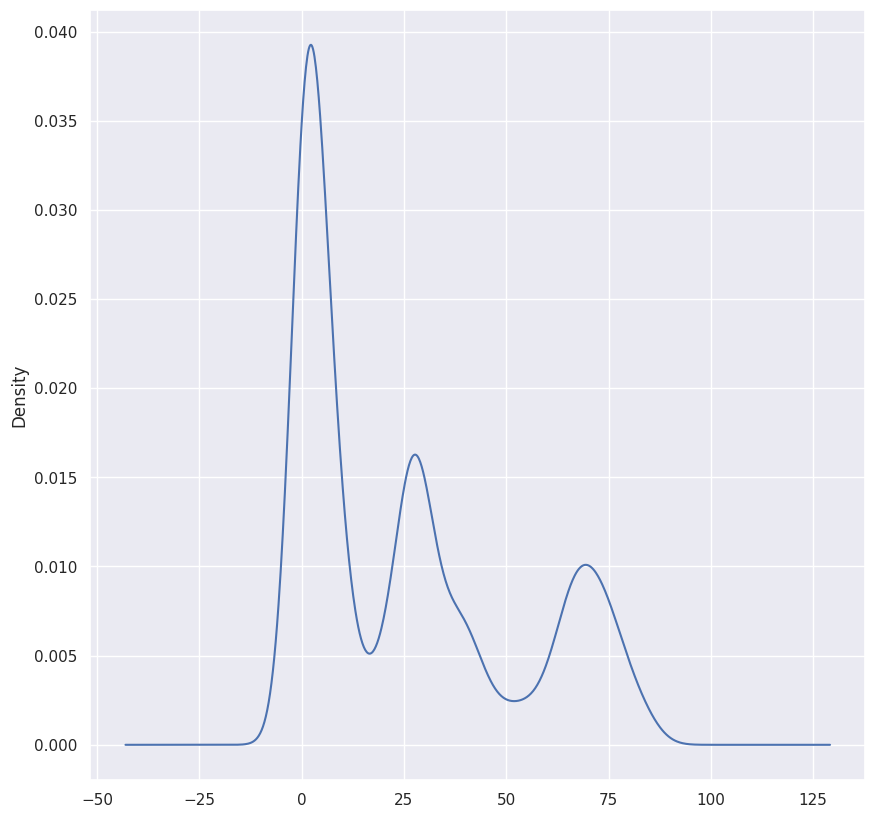

In [25]:
df_cl["Open"].plot.density()

<Axes: ylabel='Density'>

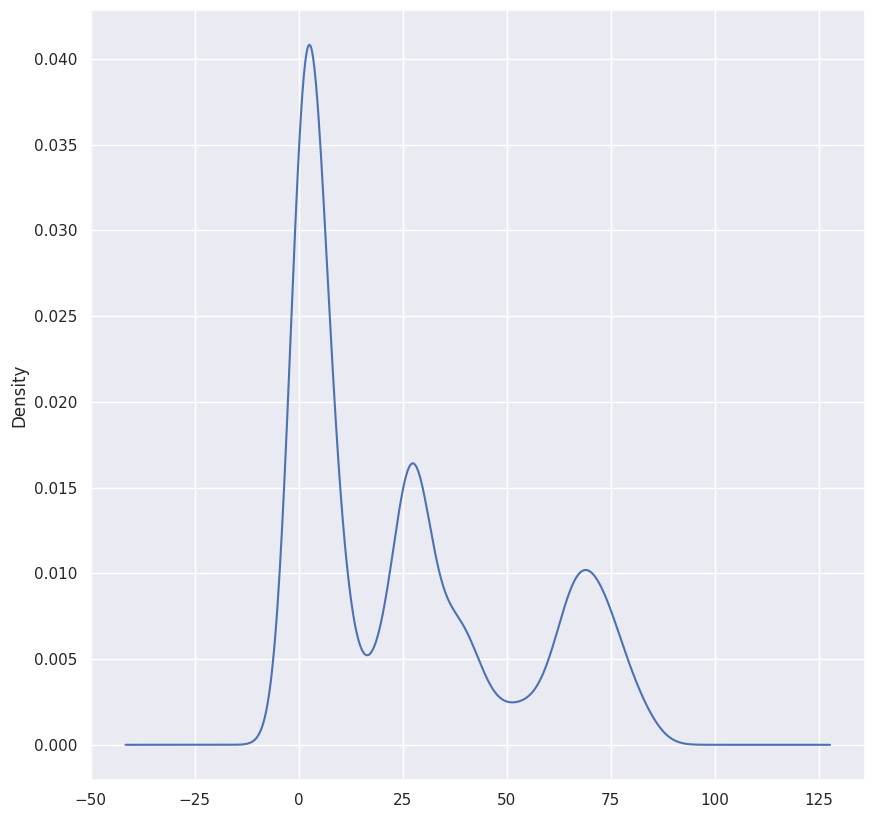

In [26]:
df_cl["Low"].plot.density()

<Axes: ylabel='Density'>

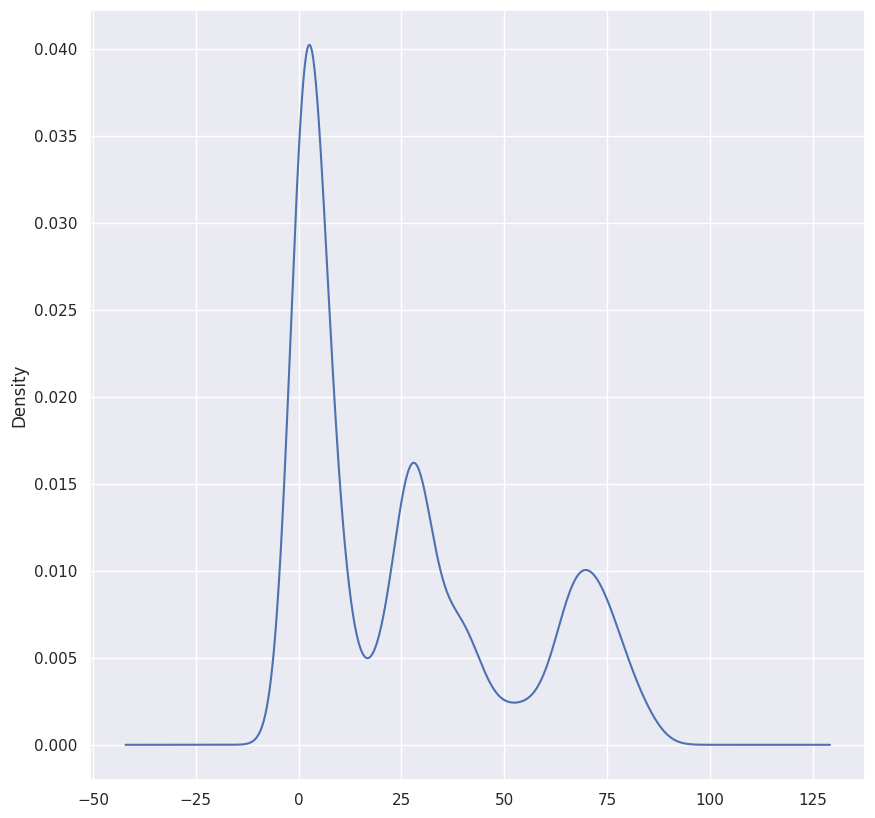

In [27]:
df_cl["High"].plot.density()

<Axes: ylabel='Density'>

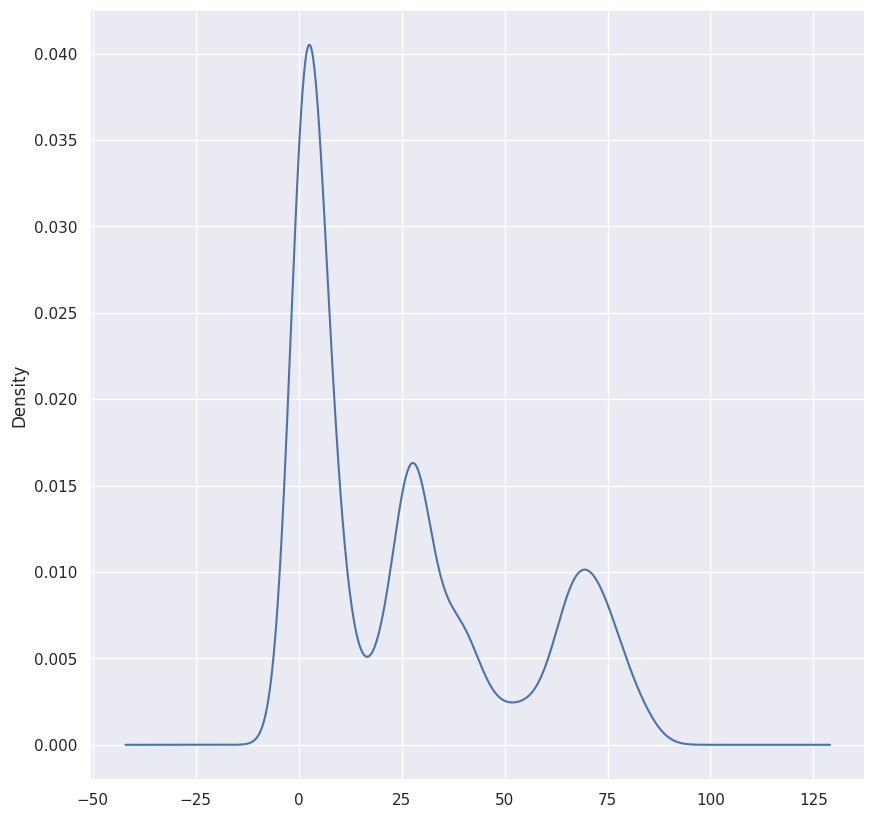

In [28]:
df_cl["Close"].plot.density()

## Caja

<Axes: >

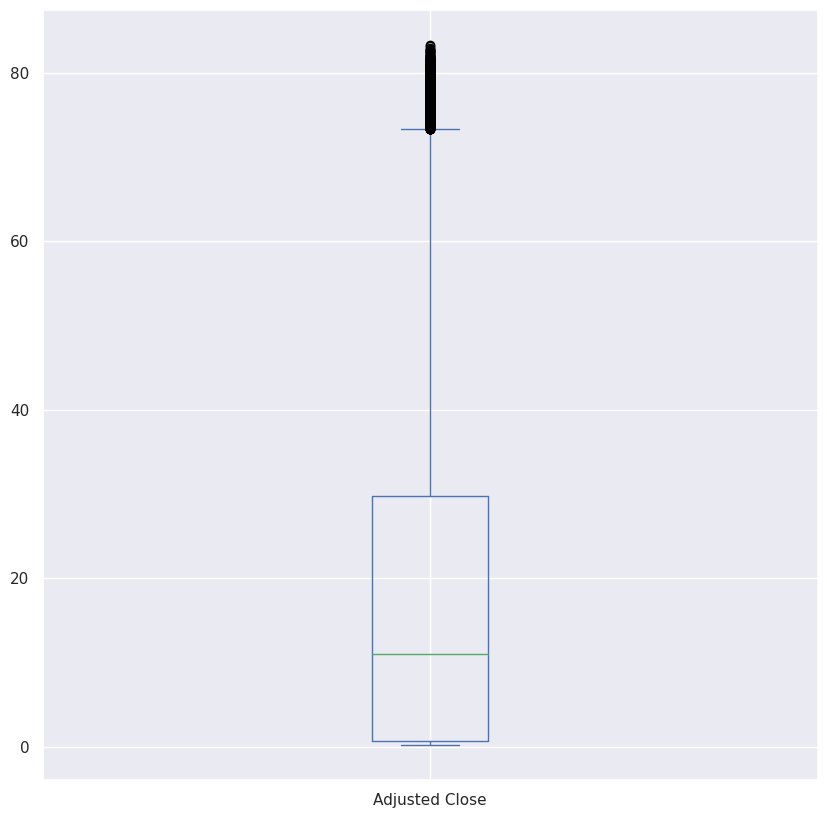

In [29]:
df_cl["Adjusted Close"].plot.box()

<Axes: >

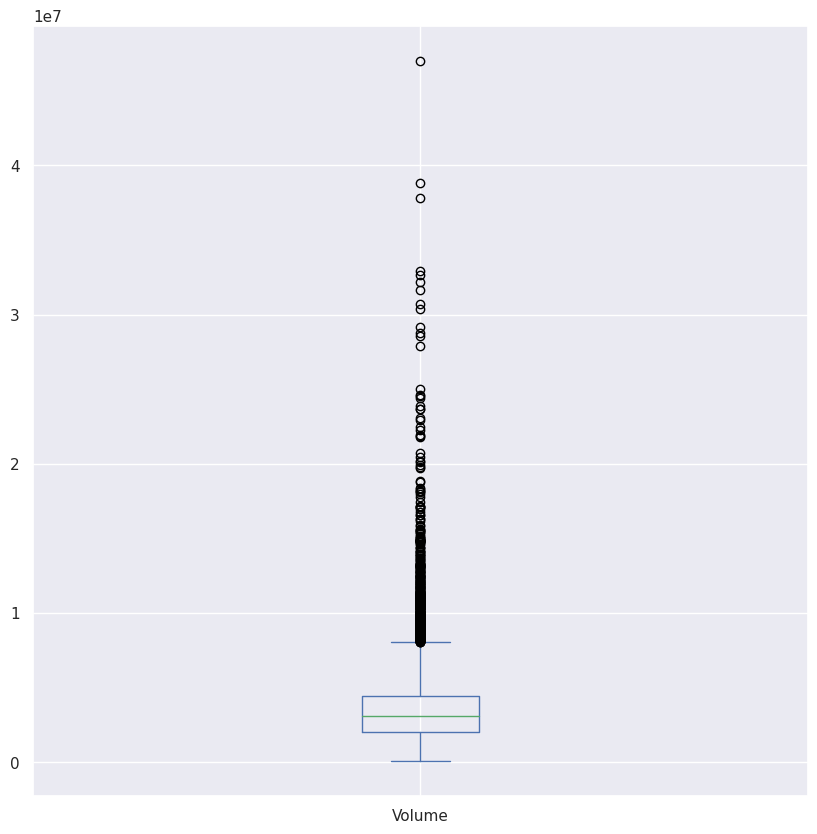

In [30]:
df_cl["Volume"].plot.box()

<Axes: >

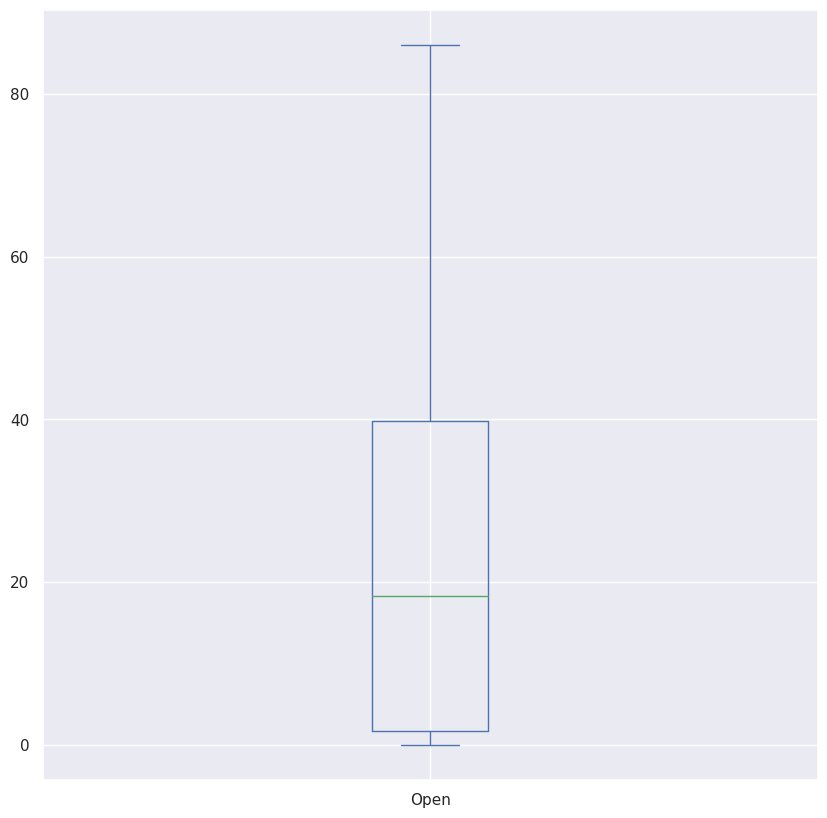

In [31]:
df_cl["Open"].plot.box()

<Axes: >

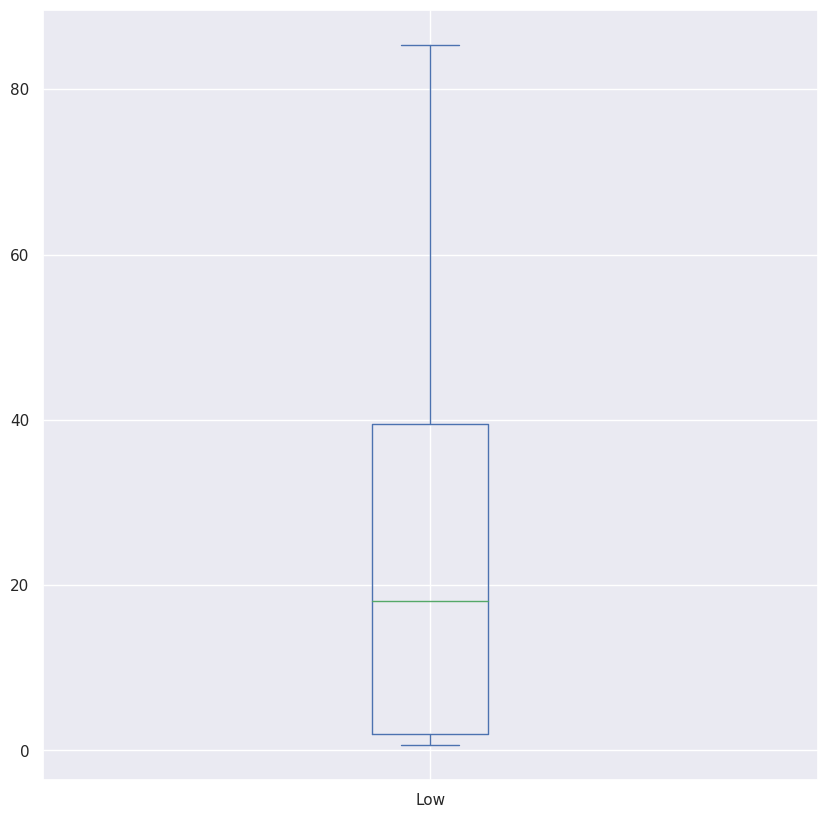

In [32]:
df_cl["Low"].plot.box()

<Axes: >

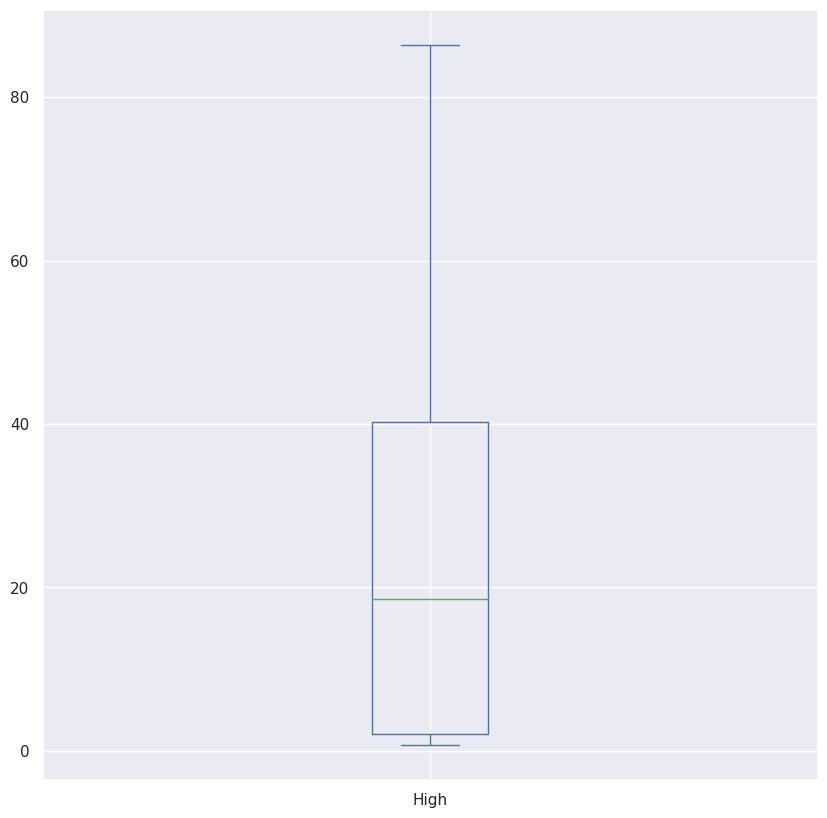

In [33]:
df_cl["High"].plot.box()

<Axes: >

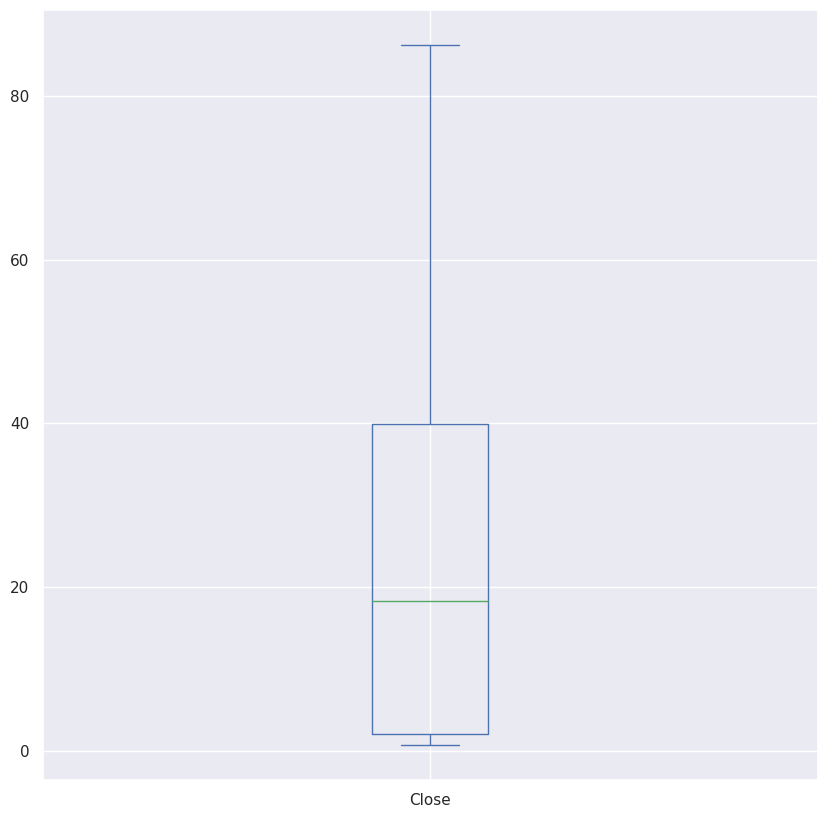

In [34]:
df_cl["Close"].plot.box()

# TensorFlow

In [35]:
variableObjetivo: str = str("Adjusted Close")

In [36]:
listaVarialesCaracterizar: list = []

listaVarialesCaracterizar.append("Volume")
listaVarialesCaracterizar.append("Open")
listaVarialesCaracterizar.append("Low")
listaVarialesCaracterizar.append("High")
listaVarialesCaracterizar.append("Close")

In [37]:
# input_shape: Cantidad de parámetros de entrada.

capa1 = tf.keras.layers.Dense(input_shape = [len(listaVarialesCaracterizar)],
                              units = int(5))
capa2 = tf.keras.layers.Dense(units = int(7))
capa3 = tf.keras.layers.Dense(units = int(3))
capa4 = tf.keras.layers.Dense(units = int(2))
salida = tf.keras.layers.Dense(units = int(1))

In [38]:
model = tf.keras.Sequential([capa1, capa2, capa3, capa4, salida])

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1),
              loss = str("mean_squared_error"))

In [40]:
history = model.fit(df_cl[listaVarialesCaracterizar].to_numpy(),
                    df_cl[variableObjetivo].to_numpy(),
                    epochs = int(1000),
                    verbose = False)

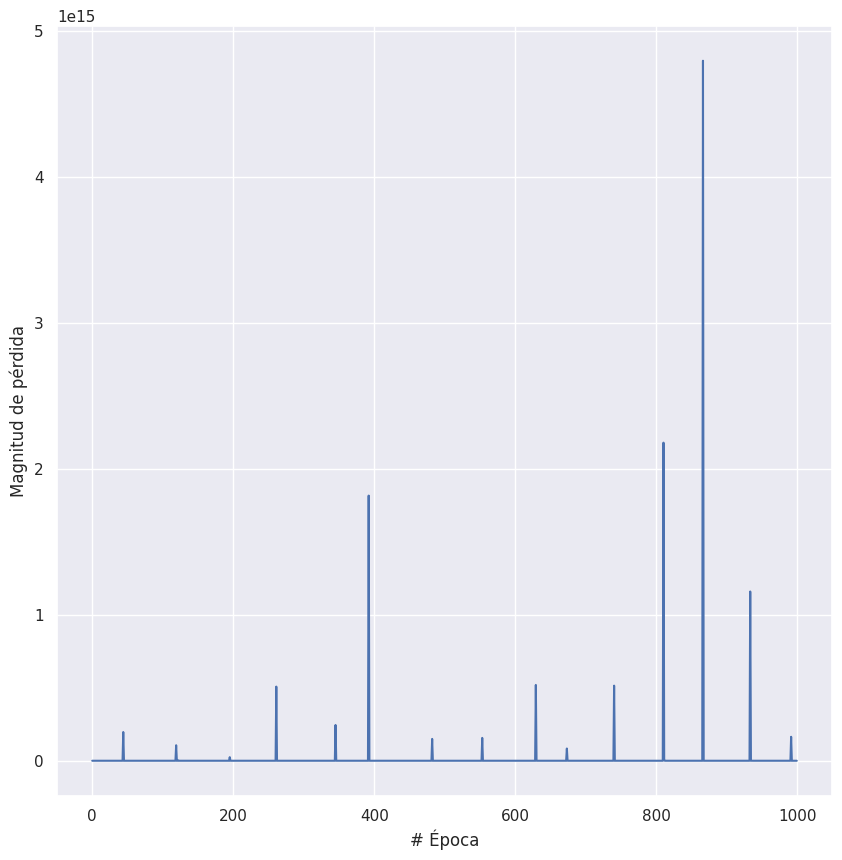

In [41]:
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])
plt.show()